<a href="https://colab.research.google.com/github/OVP2023/dataPY/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:
# Задание Баллы
8) Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):10
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов;
9) Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20;
10) Загрузить jupyter notebook с решение на github и прислать ссылку 5;
Итого - максимум 85 баллов

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/OVP2023/dataPY/main/HR.csv",sep=",")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#2) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3) Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

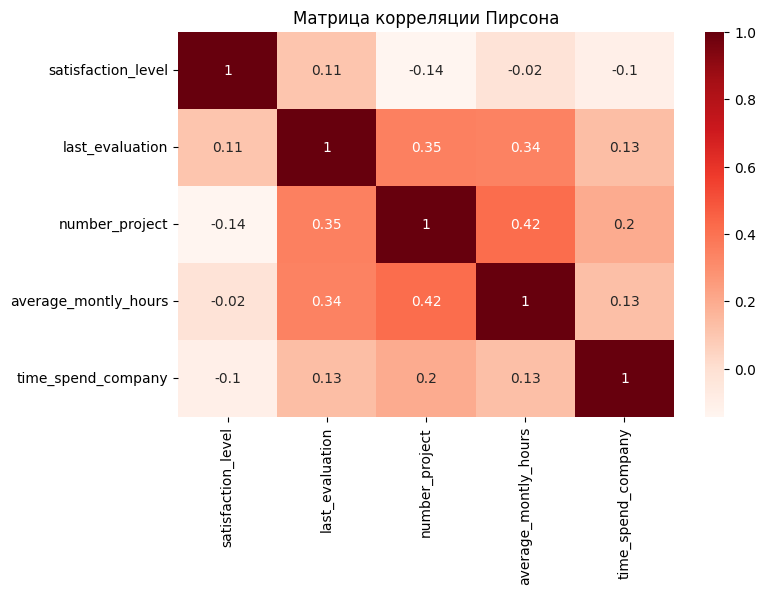

In [ ]:
corr_matrix_pearson = df[["satisfaction_level", "last_evaluation", "number_project","average_montly_hours","time_spend_company"]].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

Самые скореллированные переменные number_project и average_montly_hours, две наименее скоррелированные переменные average_montly_hours и satisfaction_level

In [ ]:
#4) Рассчитайте сколько сотрудников работает в каждом департаменте.
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

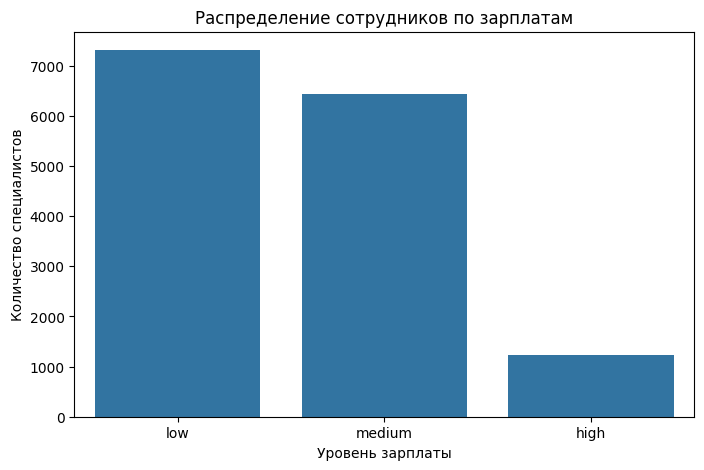

In [ ]:
#5) Распределение сотрудников по зарплатам.
plt.figure(figsize=[8, 5])
sns.countplot(data=df, x="salary")
plt.title("Распределение сотрудников по зарплатам")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

6) Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

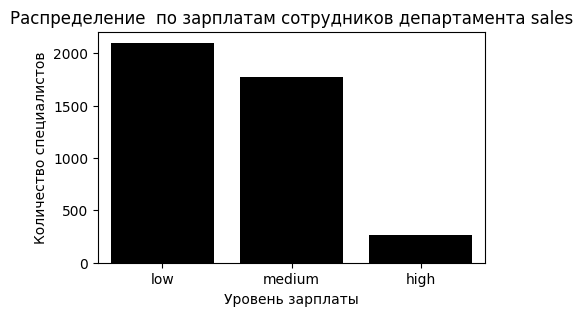

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='sales'], x="salary",order=["low","medium","high"],color="black")
plt.title("Распределение  по зарплатам сотрудников департамента sales")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

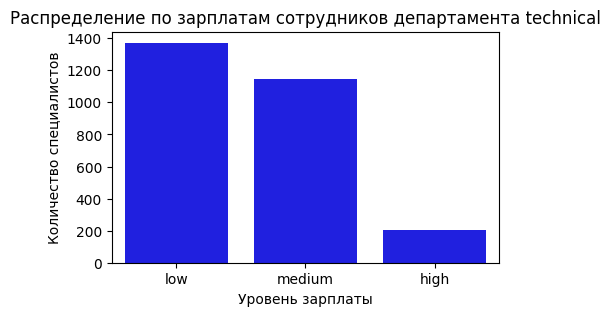

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='technical'], x="salary",order=["low","medium","high"],color="blue")
plt.title("Распределение по зарплатам сотрудников департамента technical")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

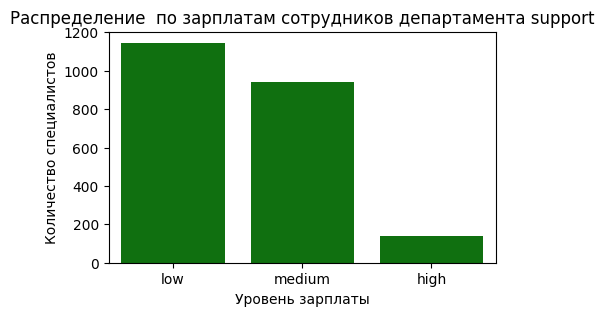

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='support'], x="salary",order=["low","medium","high"],color="green")
plt.title("Распределение  по зарплатам сотрудников департамента support")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

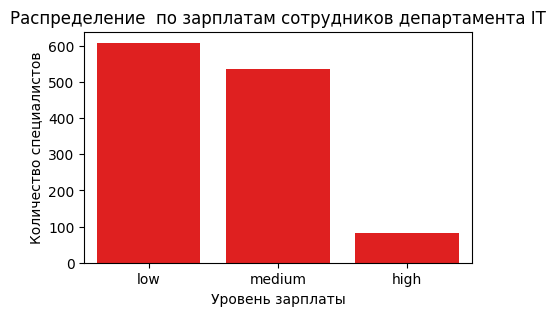

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='IT'], x="salary",order=["low","medium","high"],color="red")
plt.title("Распределение  по зарплатам сотрудников департамента IT")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()


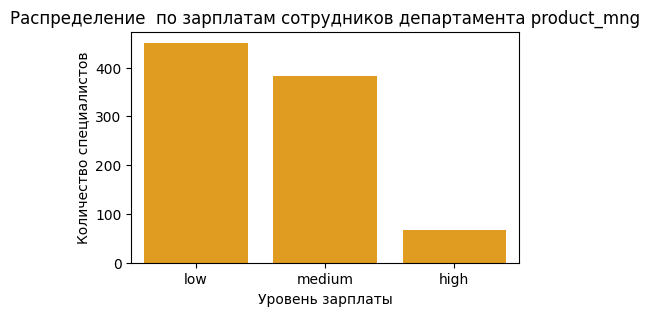

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='product_mng'], x="salary",order=["low","medium","high"],color="orange")
plt.title("Распределение  по зарплатам сотрудников департамента product_mng")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

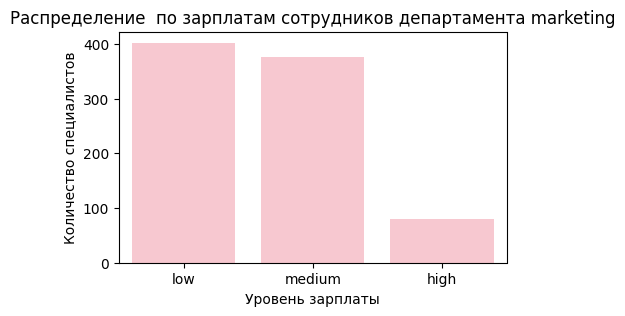

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='marketing'], x="salary",order=["low","medium","high"],color="pink")
plt.title("Распределение  по зарплатам сотрудников департамента marketing")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

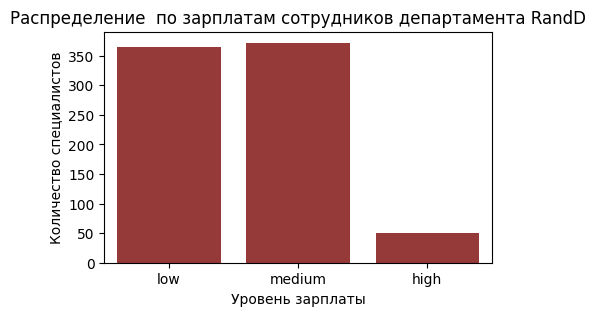

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='RandD'], x="salary",order=["low","medium","high"],color="brown")
plt.title("Распределение  по зарплатам сотрудников департамента RandD")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

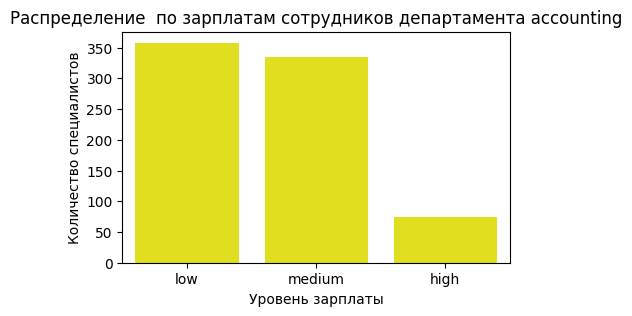

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='accounting'], x="salary",order=["low","medium","high"],color="yellow")
plt.title("Распределение  по зарплатам сотрудников департамента accounting")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

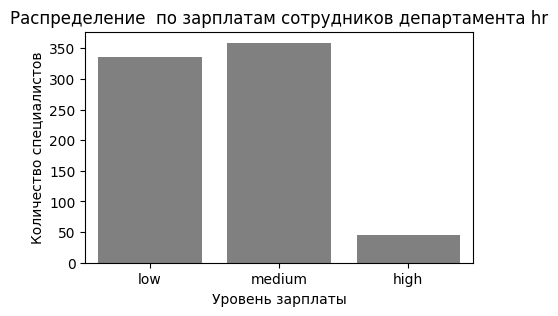

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='hr'], x="salary",order=["low","medium","high"],color="grey")
plt.title("Распределение  по зарплатам сотрудников департамента hr")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

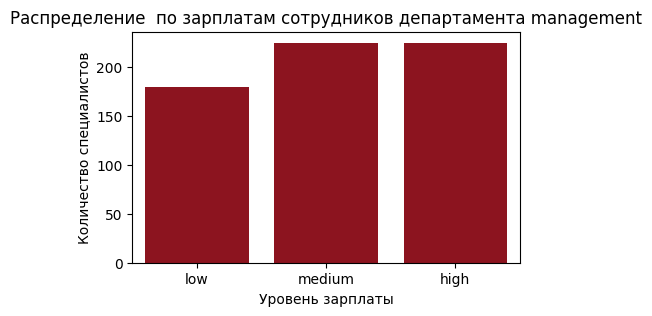

In [ ]:
plt.figure(figsize=[5, 3])
sns.countplot(data=df[df['department']=='management'], x="salary",order=["low","medium","high"],color="#A0000F")
plt.title("Распределение  по зарплатам сотрудников департамента management")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество специалистов")
plt.show()

In [ ]:
def check_normality(data): #Функция проверки на нормальное распределение
    stat, p = st.shapiro(data) #Используем критерий Шапиро-Уилка
    print(f'stat = {stat:.3f}, p = {p:.5f},', 'введен уровень значимости 0,05')
    if p > 0.05: # условие статистической значимости
        print('Вероятно нормальное распределение')
    else:
        print('Вероятно не нормальное распределение')

stat = 0.960, p = 0.00000, введен уровень значимости 0,05
Вероятно не нормальное распределение
stat = 0.971, p = 0.00000, введен уровень значимости 0,05
Вероятно не нормальное распределение


<Axes: xlabel='average_montly_hours', ylabel='Density'>

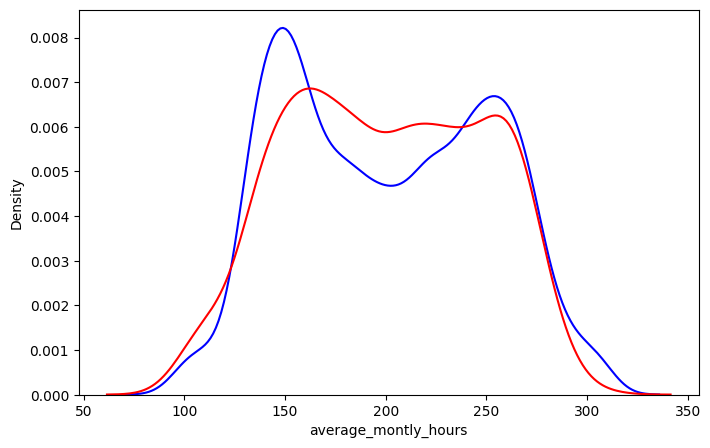

In [ ]:
#7) Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
df_low=df[df['salary']=='low']
df_high=df[df['salary']=='high']
#Проверим на нормальное распределение "average_montly_hours"
check_normality(df_low["average_montly_hours"])
check_normality(df_high["average_montly_hours"])
#Визуализация подтверждает не нормальное распределение
plt.figure(figsize=[8,5])
sns.kdeplot(df_low["average_montly_hours"], fill = False, color = 'blue')
sns.kdeplot(df_high["average_montly_hours"], fill = False, color = 'red')


Распределения не нормальные, поэтому будем использовать критерий Манна-Уитни. H0 критерия Манна-Уитни: Распределения одинаковы. Уровень значимости пусть будет равен 0.05 Так как p=1 >0.05, то нулевая гипотеза не отвергается, нет значимой статистической разницы во времени работы между сотрудниками с высокими и низкими зарплатами.

In [ ]:
stat, p = st.mannwhitneyu(df_low["average_montly_hours"], df_low["average_montly_hours"])
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

Статистика = 26761928.00000, p = 1.00000


8) Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): ● Доля сотрудников с повышением за последние 5 лет ● Средняя степень удовлетворенности ● Среднее количество проектов;

In [4]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

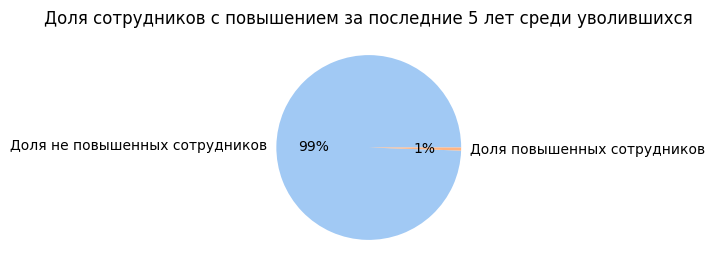

In [5]:
plt.figure(figsize=[3, 3])
df_left=df[df['left']==1]
data = df_left["promotion_last_5years"].value_counts(normalize=True)
labels = ["Доля не повышенных сотрудников","Доля повышенных сотрудников"]
colors = sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Доля сотрудников с повышением за последние 5 лет среди уволившихся")
plt.show()

In [10]:
#средняя степень удовлетворенности среди уволившихся 0.44
df_left['satisfaction_level'].mean()

0.4400980117614114

In [12]:
#среднее количество проектов среди уволившихся 3.85
df_left['number_project'].mean()

3.8555026603192384

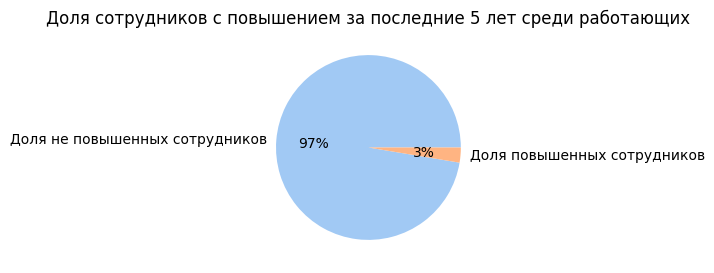

In [8]:
plt.figure(figsize=[3, 3])

df_work=df[df['left']==0]
data = df_work["promotion_last_5years"].value_counts(normalize=True)
labels = ["Доля не повышенных сотрудников","Доля повышенных сотрудников"]
colors = sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Доля сотрудников с повышением за последние 5 лет среди работающих")
plt.show()

In [9]:
#средняя степень удовлетворенности среди работающих 0.67
df_work['satisfaction_level'].mean()

0.666809590479524

In [13]:
#среднее количество проектов среди работающих 3.79
df_work['number_project'].mean()

3.786664333216661